# 01 - Problem (case study)

Data Description:
We have received data from a car insurance company, 
stating the customers personal information (state, education, gender, income, location code, marital status, 
employment status), 
their car information (Class, Size, Type)as well as 
the relevant information to the insurances product (Policy, Policy Type, Number of Policies, Coverage, Effective To Date, monthly premium auto, Months Since Policy Inception) 
their claim history with the insurance (months since last claim, Number of Open Complaints, Total Claim Amount)
their relationship with the insurance (sales channel, Renew Offer Type, Response)
and the relevance towards the insurance  (customer lifetime value)

The goal of the data analysis is to be able, based on the information above to predict the total claim amount the insurance company can expect from their customers. This would then be a tool in resetting the policies and the monthly premium, based on how high the claims can be expected.

# Import libraries

In [38]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#categorical Variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#for stats
import scipy.stats as stats

# 02 - Getting Data

In [39]:
data_mca = pd.read_csv('./marketing_customer_analysis.csv')

### Round 2 - #1
Show the dataframe shape

In [40]:
data_mca.shape

(10910, 26)

In [41]:
data_mca.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

# 03 - Cleaning/Wrangling/EDA
Standardize header names

In [42]:
data_mca = data_mca.drop(['Unnamed: 0'], axis=1)

In [43]:
#Headers without space
data_mca = data_mca.rename(columns={'EmploymentStatus':'Employment Status'})

In [44]:
#Headers all on lower case
mca = []
for mcaname in data_mca.columns:
    mca.append(mcaname.lower())
data_mca.columns = mca

In [45]:
#Headers replace the space by "_"
data_mca.columns = data_mca.columns.str.replace(' ', '_')
data_mca.columns
data_mca.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### Round 2 - #3 , #4
Which columns are numerical? Which columns are categorical?

In [46]:
data_mca.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

### Round 2 - #5 
Check and deal with NaN values.

In [47]:
#Check for duplicate rows in the data and remove if any.
sum(data_mca.duplicated()) #check how many rows are duplicated.
data_mca = data_mca.drop_duplicates()
data_mca.isna().sum()
data_mca.shape

(10873, 25)

In [48]:
data_mca_percentnan = pd.DataFrame(round(data_mca.isna().sum()/len(data_mca),4)*100)
data_mca_percentnan = data_mca_percentnan.reset_index()
data_mca_percentnan.columns = ['header_name', 'percent_nulls']
data_mca_percentnan

,header_name,percent_nulls
0,customer,0.00
1,state,5.65
2,customer_lifetime_value,0.00
3,response,5.65
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employment_status,0.00
8,gender,0.00
9,income,0.00


In [49]:
# # strategy: drop rows that have null values (only if there are very few)
data_mca[data_mca['state'].isna()==True].head(60)

#We can see that 'state' and 'response' seem to be missing in the same rows. --> drop the rows.

data_mca = data_mca[data_mca['state'].isna()==False]
data_mca.isna().sum()
data_mca.shape # --> 614 rows dropped

(10259, 25)

In [50]:
data_mca[data_mca['months_since_last_claim'].isna()==True].head(60)

#We can see that 'months_since_last_claim' and 'number_of_open_complaints' seem to be missing in the same rows. --> drop the rows.
data_mca = data_mca[data_mca['months_since_last_claim'].isna()==False]
data_mca
data_mca.isna().sum()
data_mca.shape # --> 582 rows dropped

(9677, 25)

In [51]:
# vehicle_class
# strategy: input a value for the missing value (fill in a value that we choose or calculate)
# here: fille with the mode
data_mca[data_mca['vehicle_class'].isna()==True].head(60)
data_mca['vehicle_class'].unique()
data_mca['vehicle_class'].mode()

data_mca['vehicle_class'].value_counts(dropna=True) # Four-Door Car is the most frequent one = the mode
data_mca['vehicle_class'] = data_mca['vehicle_class'].fillna(data_mca['vehicle_class'].value_counts(dropna=True).index[0])

#data_mca.isna().sum()

In [52]:
# vehicle_size
# strategy: input a value for the missing value (fill in a value that we choose or calculate)
# here: fille with the mode
data_mca[data_mca['vehicle_size'].isna()==True].head(60)
data_mca['vehicle_size'].unique()
data_mca['vehicle_size'].mode()

data_mca['vehicle_size'].value_counts(dropna=True)
data_mca['vehicle_size'] = data_mca['vehicle_size'].fillna(data_mca['vehicle_size'].value_counts(dropna=True).index[0])

#data_mca.isna().sum()

In [53]:
# vehicle_type --> nearly 50% is missing ! 
# strategy: input a value for the missing value (fill in a value that we choose or calculate)

data_mca.describe(include=[np.object]).T #--> only 1 unique value and NaN!
data_mca['vehicle_type'].unique()

# Assumption, that we have A = Automatic car and missing so "not Automatic", otherwise we could just drop the column.
data_mca['vehicle_type'] = data_mca['vehicle_type'].fillna('not A') 
data_mca.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

### Round 2 - #6
Datetime format - Extract the months from the dataset and store in a separate column. 
Then filter the data to show only the information for the first quarter , 
ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [54]:
#where is a date / month?
data_mca.dtypes #no "date" there
data_mca.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [55]:
data_mca['effective_to_date'] = pd.to_datetime(data_mca['effective_to_date'], errors='coerce')
data_mca.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,not A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,not A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,not A


In [56]:
data_mca.dtypes # now we have a date

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [57]:
data_mca['effective_to_date_month'] = data_mca['effective_to_date'].dt.month
data_mca.shape #we check that, there is one additional column

(9677, 26)

In [58]:
data_mca['effective_to_date_month'].unique() # --> irritating, this means we have only information for Q1 anyway..

data_mca_Q1 = data_mca[(data_mca['effective_to_date_month']==1) | (data_mca['effective_to_date_month']==2) | (data_mca['effective_to_date_month']==3)]
data_mca_Q1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,not A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,not A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,not A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,not A,2


### Round 2 - #7
#BONUS: Put all the previously mentioned data transformations into a function.

In [59]:
# Now define a function to clean the dataframe

def clean_dataframe(x):
    ## Standardize Headers
    #Drop the first "Unnamed: 0" column
    if 'Unnamed: 0' in x.columns:
        x = x.drop(['Unnamed: 0'], axis=1)
    else:
        x = x
    #Headers all on lower case and replace the space by "_"
    header = []
    for item in x.columns:
        header.append(item.lower().replace(' ', '_'))
    x.columns = header
    #Headers without space
    x = x.rename(columns={'EmploymentStatus':'Employment Status'})
    
    ## Check for duplicates
    x = x.drop_duplicates()
    
    ## taking care of the NAN-Values:
    #droping the NAN-Values for 'state' and 'response'
    x = x[x['state'].isna()==False]
    #droping the NAN-Values for 'months_since_last_claim' and 'number_of_open_complaints'
    x = x[x['months_since_last_claim'].isna()==False]
    #fill the 'vehicle_class' with the mean value
    x['vehicle_class'] = x['vehicle_class'].fillna(x['vehicle_class'].value_counts(dropna=True).index[0])
    #fill the 'vehicle_size' with the mean value
    x['vehicle_size'] = x['vehicle_size'].fillna(x['vehicle_size'].value_counts(dropna=True).index[0])
    #fill the NAN of vehicle_type with 'not A', because 50%
    x['vehicle_type'] = x['vehicle_type'].fillna('not A')
    #
    x['effective_to_date'] = pd.to_datetime(x['effective_to_date'], errors='coerce')
    x['effective_to_date_month'] = x['effective_to_date'].dt.month
    return x

data_mca_test = pd.read_csv('./marketing_customer_analysis.csv')
data_mca_test.shape

(10910, 26)

In [60]:
data_mca_test = clean_dataframe(data_mca_test)
data_mca_test.shape

(9677, 26)

# Round 3 - EDA (Exploratory Data Analysis)

###  Round 3 - #1 , #2
Show DataFrame info, Describe Data Frame

In [61]:
# describing the numerical columns
summary_numerical = data_mca.describe().T 

# additionnaly we add the range and the iqr
summary_numerical['iqr'] = summary_numerical['75%']-summary_numerical['25%']
summary_numerical['range'] = summary_numerical['max']-summary_numerical['min']
summary_numerical

#round up the values to 2 decimals (round() would round to 0 decimals) --> with function
def roundforme(x):
    return round(x,2)

#to round the whole table..
for col in summary_numerical.columns:
    summary_numerical[col] = summary_numerical[col].apply(roundforme)
summary_numerical

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,9677.0,8042.07,6962.49,1898.01,3991.73,5771.61,8986.61,83325.38,4994.88,81427.37
income,9677.0,37675.18,30380.91,0.00,0.00,34080.00,62291.00,99981.00,62291.00,99981.00
monthly_premium_auto,9677.0,93.21,34.47,61.00,68.00,83.00,109.00,298.00,41.00,237.00
months_since_last_claim,9677.0,15.13,10.06,0.00,6.00,14.00,23.00,35.00,17.00,35.00
months_since_policy_inception,9677.0,48.13,27.91,0.00,24.00,48.00,71.00,99.00,47.00,99.00
number_of_open_complaints,9677.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00,5.00
number_of_policies,9677.0,2.96,2.39,1.00,1.00,2.00,4.00,9.00,3.00,8.00
total_claim_amount,9677.0,434.38,291.48,0.10,272.65,383.17,547.20,2893.24,274.55,2893.14
effective_to_date_month,9677.0,1.46,0.50,1.00,1.00,1.00,2.00,2.00,1.00,1.00


In [62]:
#DataFrame info
info_data = data_mca.info()
info_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9677 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9677 non-null   object        
 1   state                          9677 non-null   object        
 2   customer_lifetime_value        9677 non-null   float64       
 3   response                       9677 non-null   object        
 4   coverage                       9677 non-null   object        
 5   education                      9677 non-null   object        
 6   effective_to_date              9677 non-null   datetime64[ns]
 7   employment_status              9677 non-null   object        
 8   gender                         9677 non-null   object        
 9   income                         9677 non-null   int64         
 10  location_code                  9677 non-null   object        
 11  marital_status  

In [63]:
# describing the object columns
summary_objects = data_mca.describe(include=[np.object]).T
summary_objects

,count,unique,top,freq
customer,9677,9134,BG42047,3
state,9677,5,California,3344
response,9677,2,No,8289
coverage,9677,3,Basic,5905
education,9677,5,Bachelor,2913
employment_status,9677,5,Employed,6035
gender,9677,2,F,4934
location_code,9677,3,Suburban,6126
marital_status,9677,3,Married,5605
policy_type,9677,3,Personal Auto,7208


###  Round 3 - #3
Show a plot of the total number of responses.

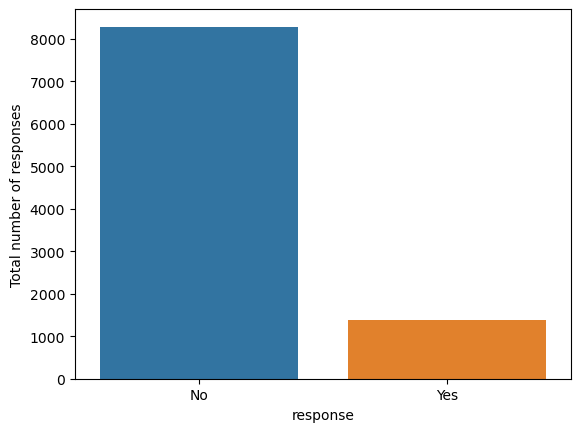

In [64]:
sns.countplot(x=data_mca['response'])
plt.ylabel('Total number of responses')
plt.show()

###  Round 3 - #4
Show a plot of the response rate by the sales channel.

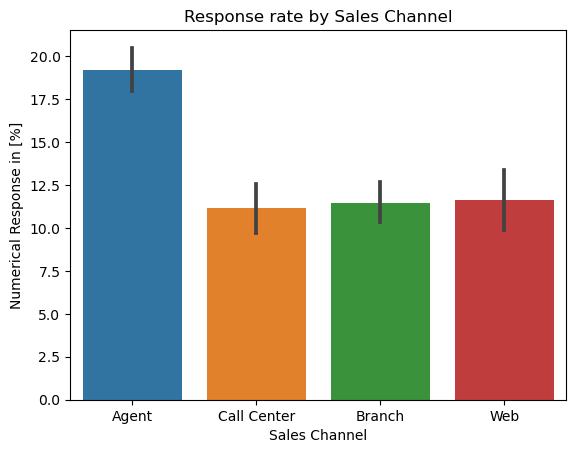

In [65]:
import matplotlib.pyplot as plt
data_mca['numerical_response'] = data_mca['response'].map(dict(Yes=1,No=0))*100 #in %!
data_mca

sns.barplot(x="sales_channel", y="numerical_response", data=data_mca)

plt.xlabel("Sales Channel")
plt.ylabel("Numerical Response in [%]")
plt.title("Response rate by Sales Channel")
plt.show()

###  Round 3 - #5
Show a plot of the response rate by the total claim amount.

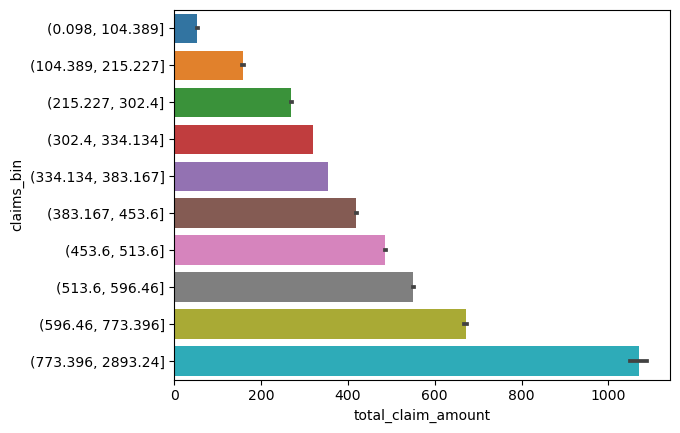

In [66]:
#perform data binning on points variable with specific quantiles and labels
data_mca['claims_bin'] = pd.qcut(data_mca['total_claim_amount'], q=10)
data_mca

sns.barplot(x = data_mca['total_claim_amount'],y=data_mca['claims_bin'] ,data=data_mca)
plt.show()

###  Round 3 - #6
Show a plot of the response rate by income

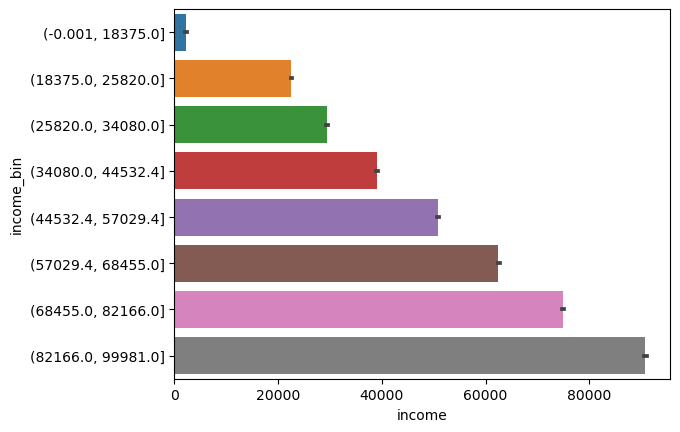

In [67]:
data_mca['income_bin'] = pd.qcut(data_mca['income'], q=10, duplicates='drop')
data_mca

sns.barplot(x = data_mca['income'],y=data_mca['income_bin'] ,data=data_mca)
plt.show()

# 04 - Processing Data

###  Round 4 - #1
Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [68]:
data_mca.dtypes

categoricals = data_mca.select_dtypes(include=np.object)
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [69]:
numerical = data_mca.select_dtypes(include=np.number)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_to_date_month', 'numerical_response'],
      dtype='object')

###  Round 4 - #2
Now we will try to check the normality of the numerical variables visually.

#### Round 4 - #2.1
Use seaborn library to construct distribution plots for the numerical variables

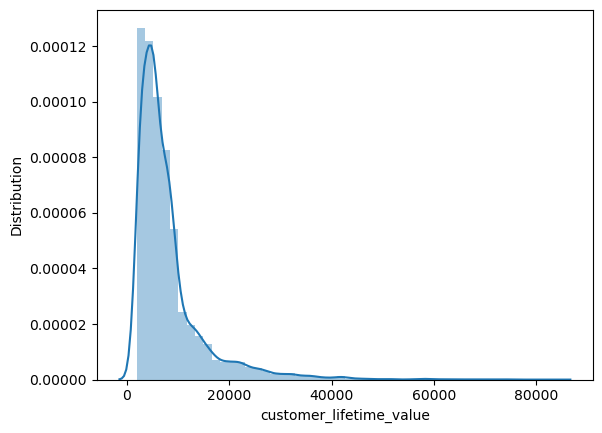

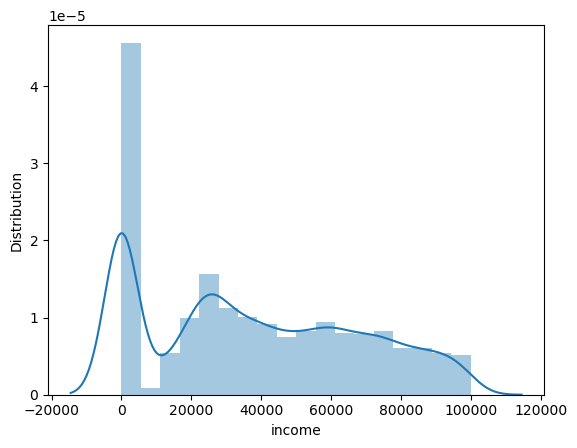

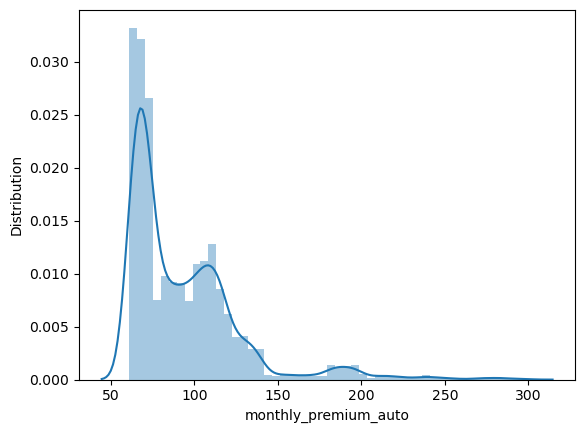

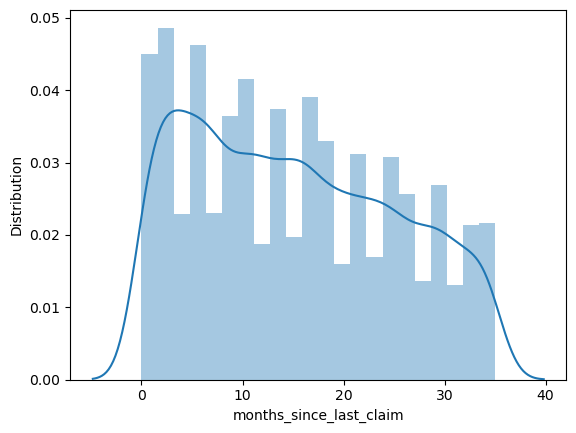

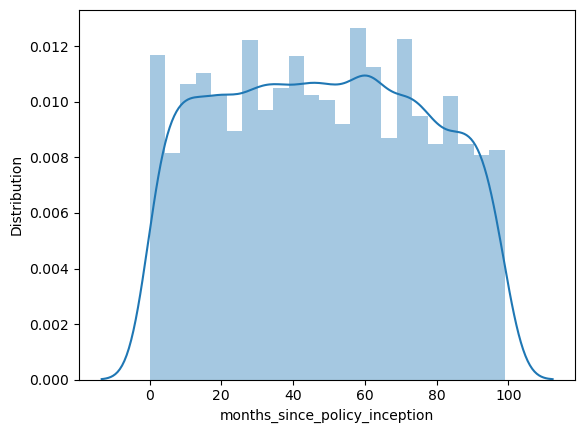

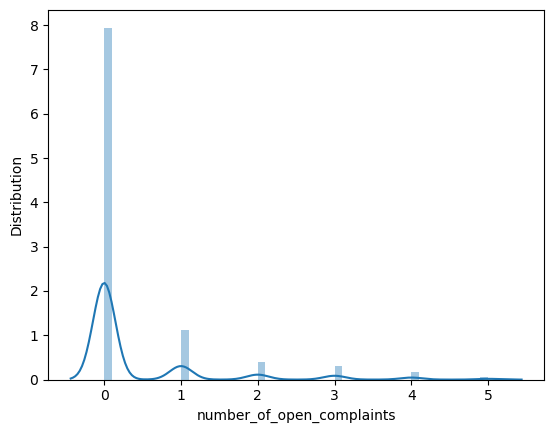

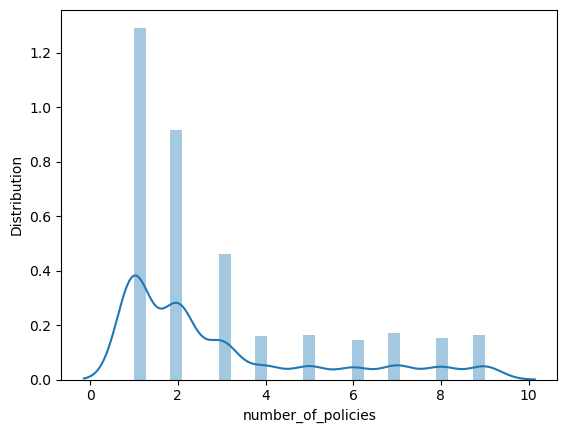

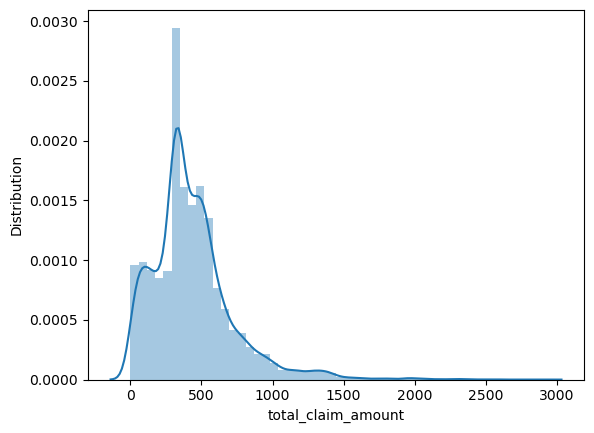

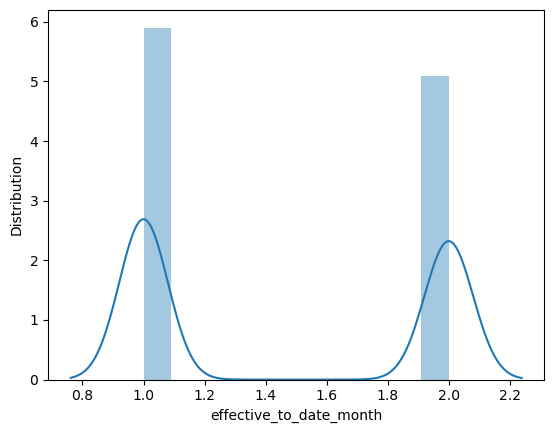

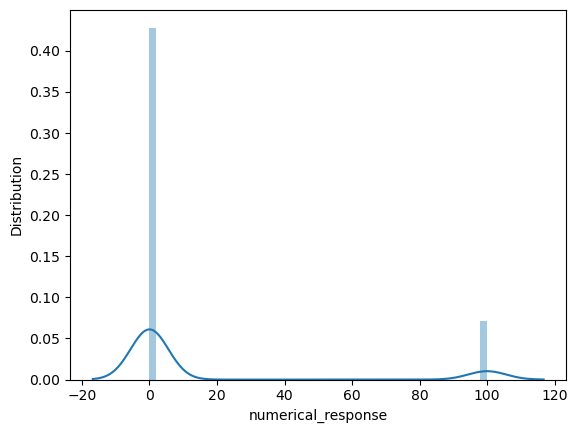

In [70]:
for i in numerical.columns:
    sns.distplot(numerical,x=numerical[i])
    plt.xlabel(i)
    plt.ylabel('Distribution')
    plt.show()

#### Round 4 - #2.2
Use Matplotlib to construct histograms

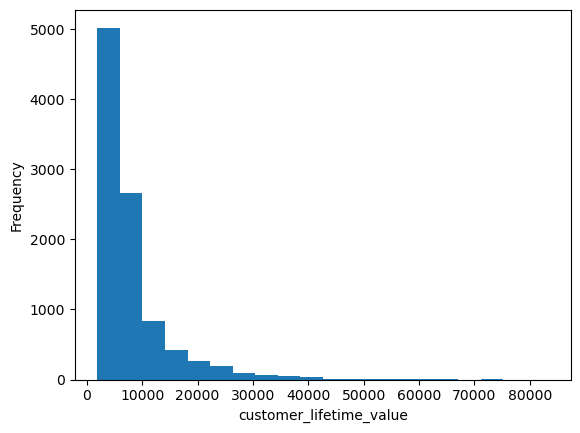

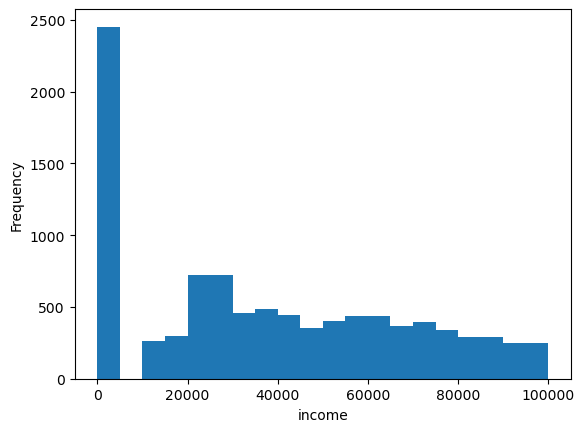

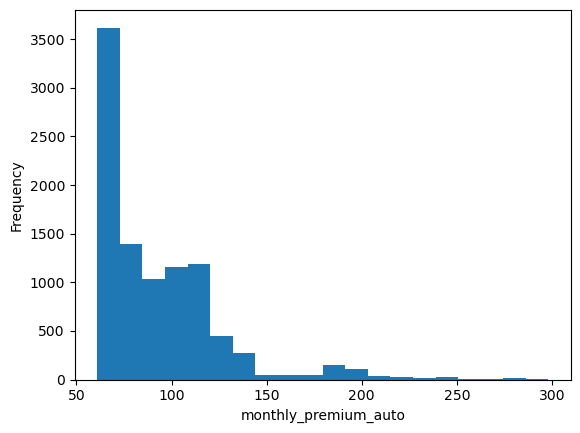

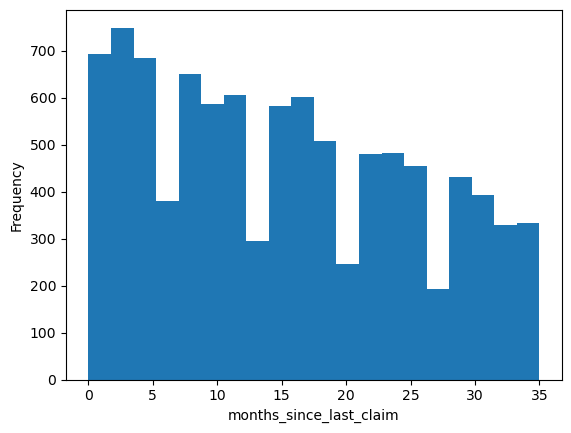

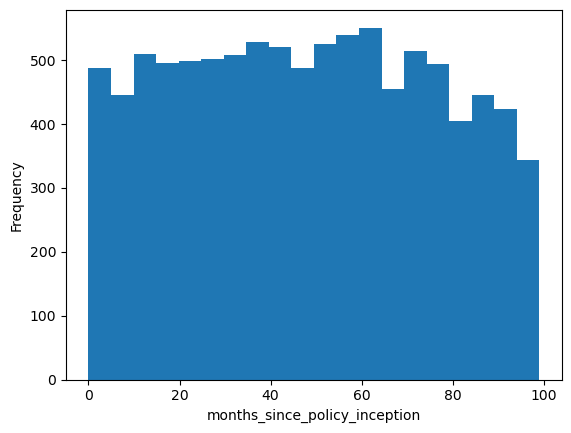

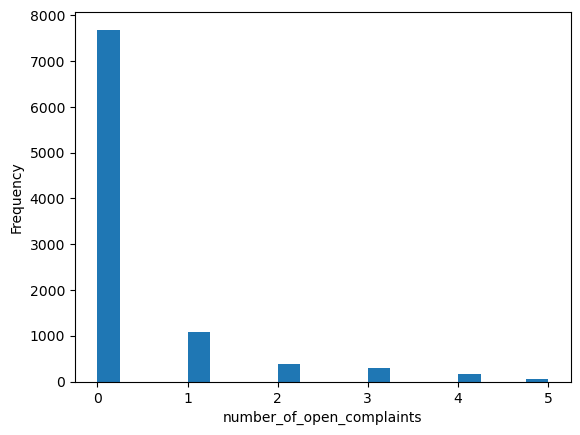

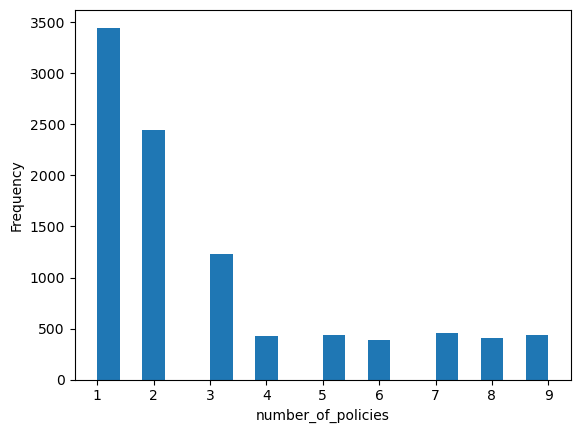

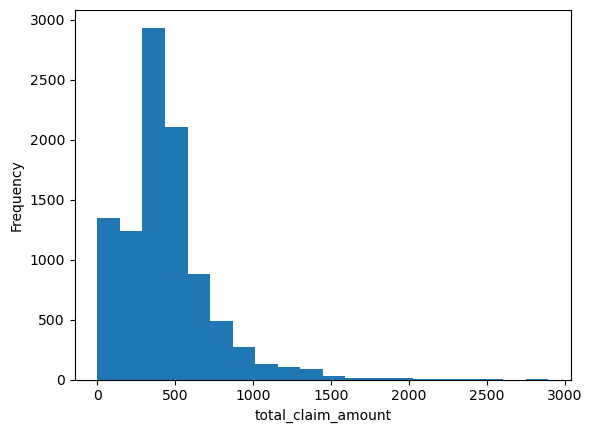

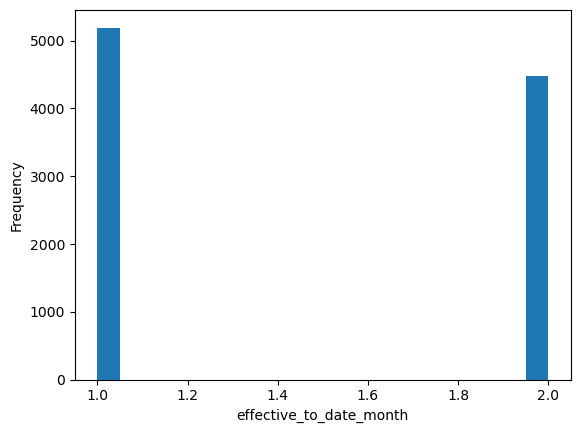

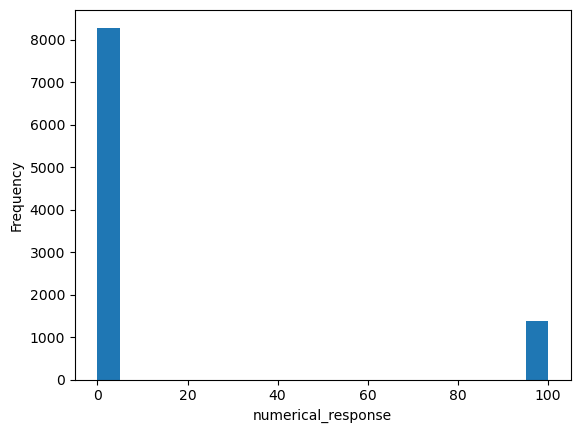

In [71]:
# https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

for i in numerical.columns:
    plt.hist(numerical[i], bins=20)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

#### Round 4 - #2.3
Do the distributions for different numerical variables do look like a normal distribution?

The Distribution of the Customer Lifetime Value looks normally distributed. 
Total Claim Amount looks somewhat normally distributed

#### Round 4 - #3 - #4
For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [72]:
correlations_matrix = roundforme(numerical.corr())
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month,numerical_response
customer_lifetime_value,1.00,0.03,0.40,0.02,0.01,-0.03,0.02,0.23,-0.01,-0.01
income,0.03,1.00,-0.01,-0.02,-0.01,0.00,-0.01,-0.35,-0.00,0.01
monthly_premium_auto,0.40,-0.01,1.00,0.01,0.02,-0.01,-0.02,0.63,0.01,0.01
months_since_last_claim,0.02,-0.02,0.01,1.00,-0.04,0.01,0.01,0.01,-0.02,-0.02
months_since_policy_inception,0.01,-0.01,0.02,-0.04,1.00,0.00,-0.01,0.01,0.01,-0.00
number_of_open_complaints,-0.03,0.00,-0.01,0.01,0.00,1.00,0.00,-0.01,-0.01,-0.01
number_of_policies,0.02,-0.01,-0.02,0.01,-0.01,0.00,1.00,-0.01,0.01,-0.02
total_claim_amount,0.23,-0.35,0.63,0.01,0.01,-0.01,-0.01,1.00,0.01,0.02
effective_to_date_month,-0.01,-0.00,0.01,-0.02,0.01,-0.01,0.01,0.01,1.00,-0.03
numerical_response,-0.01,0.01,0.01,-0.02,-0.00,-0.01,-0.02,0.02,-0.03,1.00


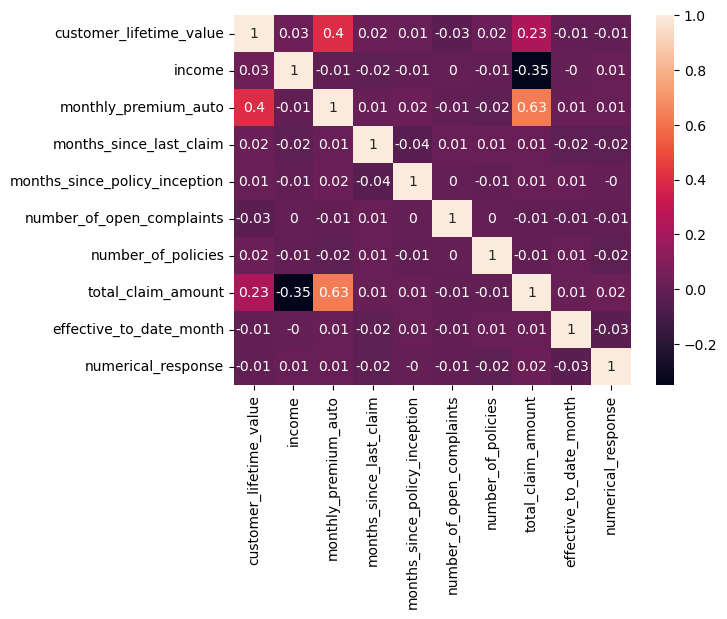

In [73]:
#heatmap
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [74]:
###
# 0.9 and 1.0 very highly correlated
# 0.7 and 0.9 highly correlated
# 0.5 and 0.7 moderately correlated
# 0.3 and 0.5 low correlation
# less than 0.3 little if any (linear) correlation. 
###

# Target Value: Total Claim Amount 
# is moderately correlated with monthly_premium_auto (0.63)
# is lowly correlated with income (-0.35)

# There is no correlation/colinearity between monthly premium auto and income (-0.0014)

# Round 5 - Processing Data

#### Round 5 - #1 X-y split

In [75]:
data_mca.shape

(9677, 29)

In [76]:
y = data_mca['total_claim_amount']
X = data_mca.drop(['total_claim_amount'], axis=1)
X.head()
X.shape # one column is dropped, ok.
display(X)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month,numerical_response,claims_bin,income_bin
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A,2,0,"(215.227, 302.4]","(44532.4, 57029.4]"
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,not A,1,0,"(596.46, 773.396]","(-0.001, 18375.0]"
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,SUV,Medsize,A,2,0,"(453.6, 513.6]","(18375.0, 25820.0]"
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1,100,"(453.6, 513.6]","(44532.4, 57029.4]"
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,not A,2,0,"(215.227, 302.4]","(34080.0, 44532.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,1,0,"(334.134, 383.167]","(57029.4, 68455.0]"
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A,2,0,"(773.396, 2893.24]","(-0.001, 18375.0]"
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1,0,"(215.227, 302.4]","(57029.4, 68455.0]"
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate L3,Offer1,Web,Luxury SUV,Medsize,not A,2,0,"(334.134, 383.167]","(34080.0, 44532.4]"


In [77]:
#Dropping useless columns
X = X.drop(['customer', 'effective_to_date', 'effective_to_date_month', 'numerical_response','claims_bin','income_bin'],axis=1)
X.head()
X.shape

(9677, 22)

In [78]:
X.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
vehicle_type                      object
dtype: object

In [79]:
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(object)

In [80]:
X_num.shape

(9677, 7)

In [81]:
X_cat.shape

(9677, 15)

#### Round 5 - #2 Normalize (numerical)

Normalization or Min-Max Scaling is used to transform features to be on a similar scale. 

The new point is calculated as:
X_new = (X - X_min)/(X_max - X_min)

This scales the range to [0, 1] or sometimes [-1, 1]. 
Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional 
unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with 
them. Usually, we would scale age and not incomes because only a few people have high incomes 
but the age is close to uniform.

In [82]:
# This is the code for the MIN-MAX-Normalizing, in this lab I chose to do the Standard Normalizing, 
# because it takes into account more the outliers.

# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
X_num_normalized = transformer.transform(X_num)
print(X_num_normalized.shape)

X_num_normalized=pd.DataFrame(X_num_normalized, columns=X_num.columns)
X_num_normalized

(9677, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375
...,...,...,...,...,...,...,...
9672,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000
9673,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125
9674,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625
9675,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125


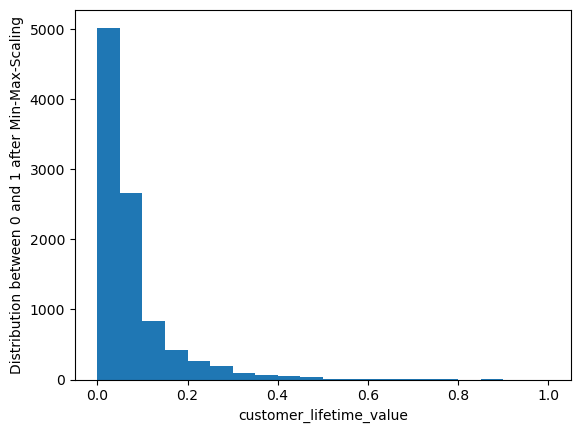

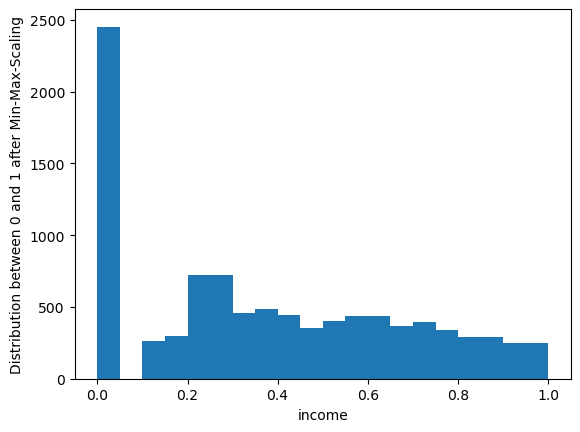

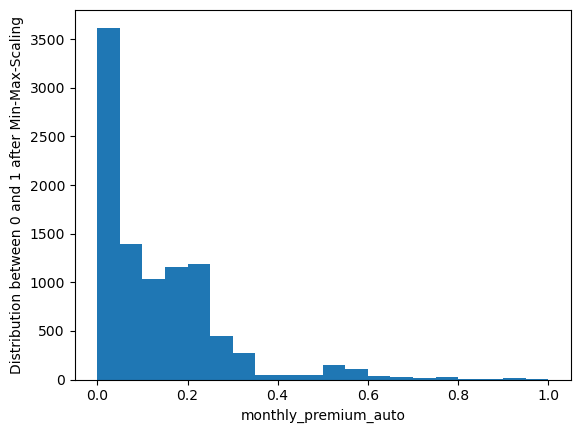

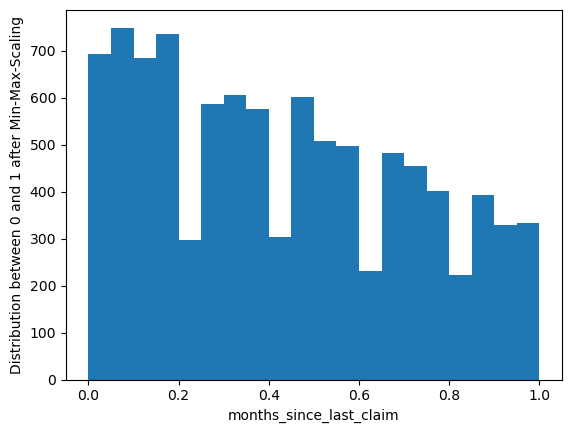

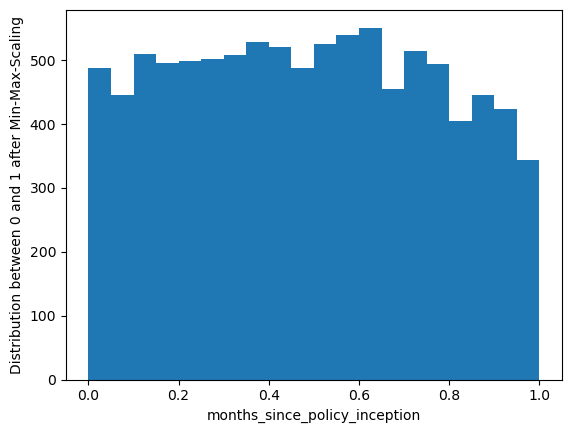

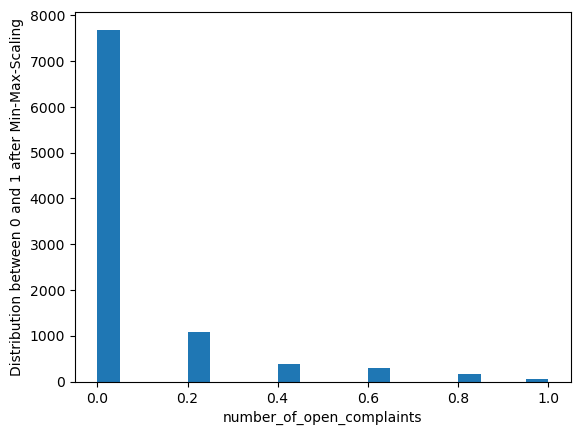

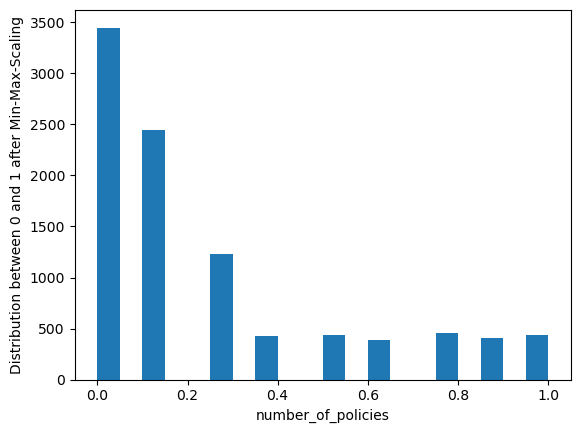

In [83]:
# the Min-Max-Scaling scales everything between 0 and 1, as you can see on the plots.
for i in X_num_normalized.columns:
    plt.hist(X_num_normalized[i], bins=20)
    plt.xlabel(i)
    plt.ylabel('Distribution between 0 and 1 after Min-Max-Scaling')
    plt.show()

Standardization or Z-Score Normalization is the transformation of features 
by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

X_new = (X - mean)/Std

Standardization can be helpful in cases where the data follows a Gaussian distribution. 
However, this does not have to be necessarily true. Geometrically speaking, it translates 
the data to the mean vector of original data to the origin and squishes or expands the 
points if std is 1 respectively. We can see that we are just changing mean and standard 
deviation to a standard normal distribution which is still normal thus the shape of the 
distribution is not affected.

Standardization does not get affected by outliers because there is no predefined range of transformed features.

In [84]:
# # Standardization or Z-Score Normalization
# transformer = StandardScaler().fit(X_num)
# X_num_normalized = transformer.transform(X_num)
# print(X_num_normalized.shape)

# X_num_normalized= pd.DataFrame(X_num_normalized, columns=X_num.columns)
# X_num_normalized

# Round 6 - Processing Data, Linear Regression, Model Validation

#### Round 6 - Processing Data - #1 One Hot/Label Encoding (categorical).

In [85]:
X_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,not A
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,not A
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,not A


In [86]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
encoder = OneHotEncoder(drop='first').fit(X_cat) # the first one is the most frequent one.
#print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()

cols = encoder.get_feature_names(input_features=X_cat.columns)
cols

onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()
onehot_encoded.shape
onehot_encoded.columns

Index(['state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_Yes', 'coverage_Extended', 'coverage_Premium',
       'education_College', 'education_Doctor',
       'education_High School or Below', 'education_Master',
       'employment_status_Employed', 'employment_status_Medical Leave',
       'employment_status_Retired', 'employment_status_Unemployed', 'gender_M',
       'location_code_Suburban', 'location_code_Urban',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Luxury Car',
       'vehicle_cl

#### Round 6 - Processing Data - #2 Concat DataFrames

In [87]:
X = pd.concat([X_num_normalized, onehot_encoded], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_not A
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9672,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9673,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9674,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9675,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Round 6 - Linear Regression - #3 Train-test split.

In [88]:
y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

In [89]:
###
# 0.9 and 1.0 very highly correlated
# 0.7 and 0.9 highly correlated
# 0.5 and 0.7 moderately correlated
# 0.3 and 0.5 low correlation
# less than 0.3 little if any (linear) correlation. 
###

### Now we do the correlation for the categoricals as well:
Collinearity = pd.concat((y, X), axis=1)
corr_matrix_cat = roundforme(Collinearity.corr())
corr_matrix_cat #44x44-matrix!

# We filter out all the values that are below 0.3 (little if any little correlation)
filtered_matrix = corr_matrix_cat[((corr_matrix_cat >= .3) | (corr_matrix_cat <= -.3))]
filtered_matrix

# to check the correlation with the Total Claim Amount
print(filtered_matrix.iloc[0])

### From numericals:
# Target Value: Total Claim Amount 
# is moderately correlated with monthly_premium_auto (0.63)
# is lowly correlated with income (-0.35)
# There is no correlation between monthly premium auto and income (-0.0014)

### Result from categoricals:
# Target Value: Total Claim Amount
# is lowly correlated with employment_status_Employed (-0.33)
# is lowly correlated with employment_status_Unemployed (-0.33)
# is moderately correlated with location_code_Suburban (0.58)
# is lowly correlated with vehicle_class_Luxury Car (0.31)
# is lowly correlated with vehicle_class_Luxury SUV (0.31)

total_claim_amount                 1.00
customer_lifetime_value             NaN
income                            -0.35
monthly_premium_auto               0.63
months_since_last_claim             NaN
months_since_policy_inception       NaN
number_of_open_complaints           NaN
number_of_policies                  NaN
state_California                    NaN
state_Nevada                        NaN
state_Oregon                        NaN
state_Washington                    NaN
response_Yes                        NaN
coverage_Extended                   NaN
coverage_Premium                    NaN
education_College                   NaN
education_Doctor                    NaN
education_High School or Below      NaN
education_Master                    NaN
employment_status_Employed        -0.33
employment_status_Medical Leave     NaN
employment_status_Retired           NaN
employment_status_Unemployed       0.33
gender_M                            NaN
location_code_Suburban             0.58


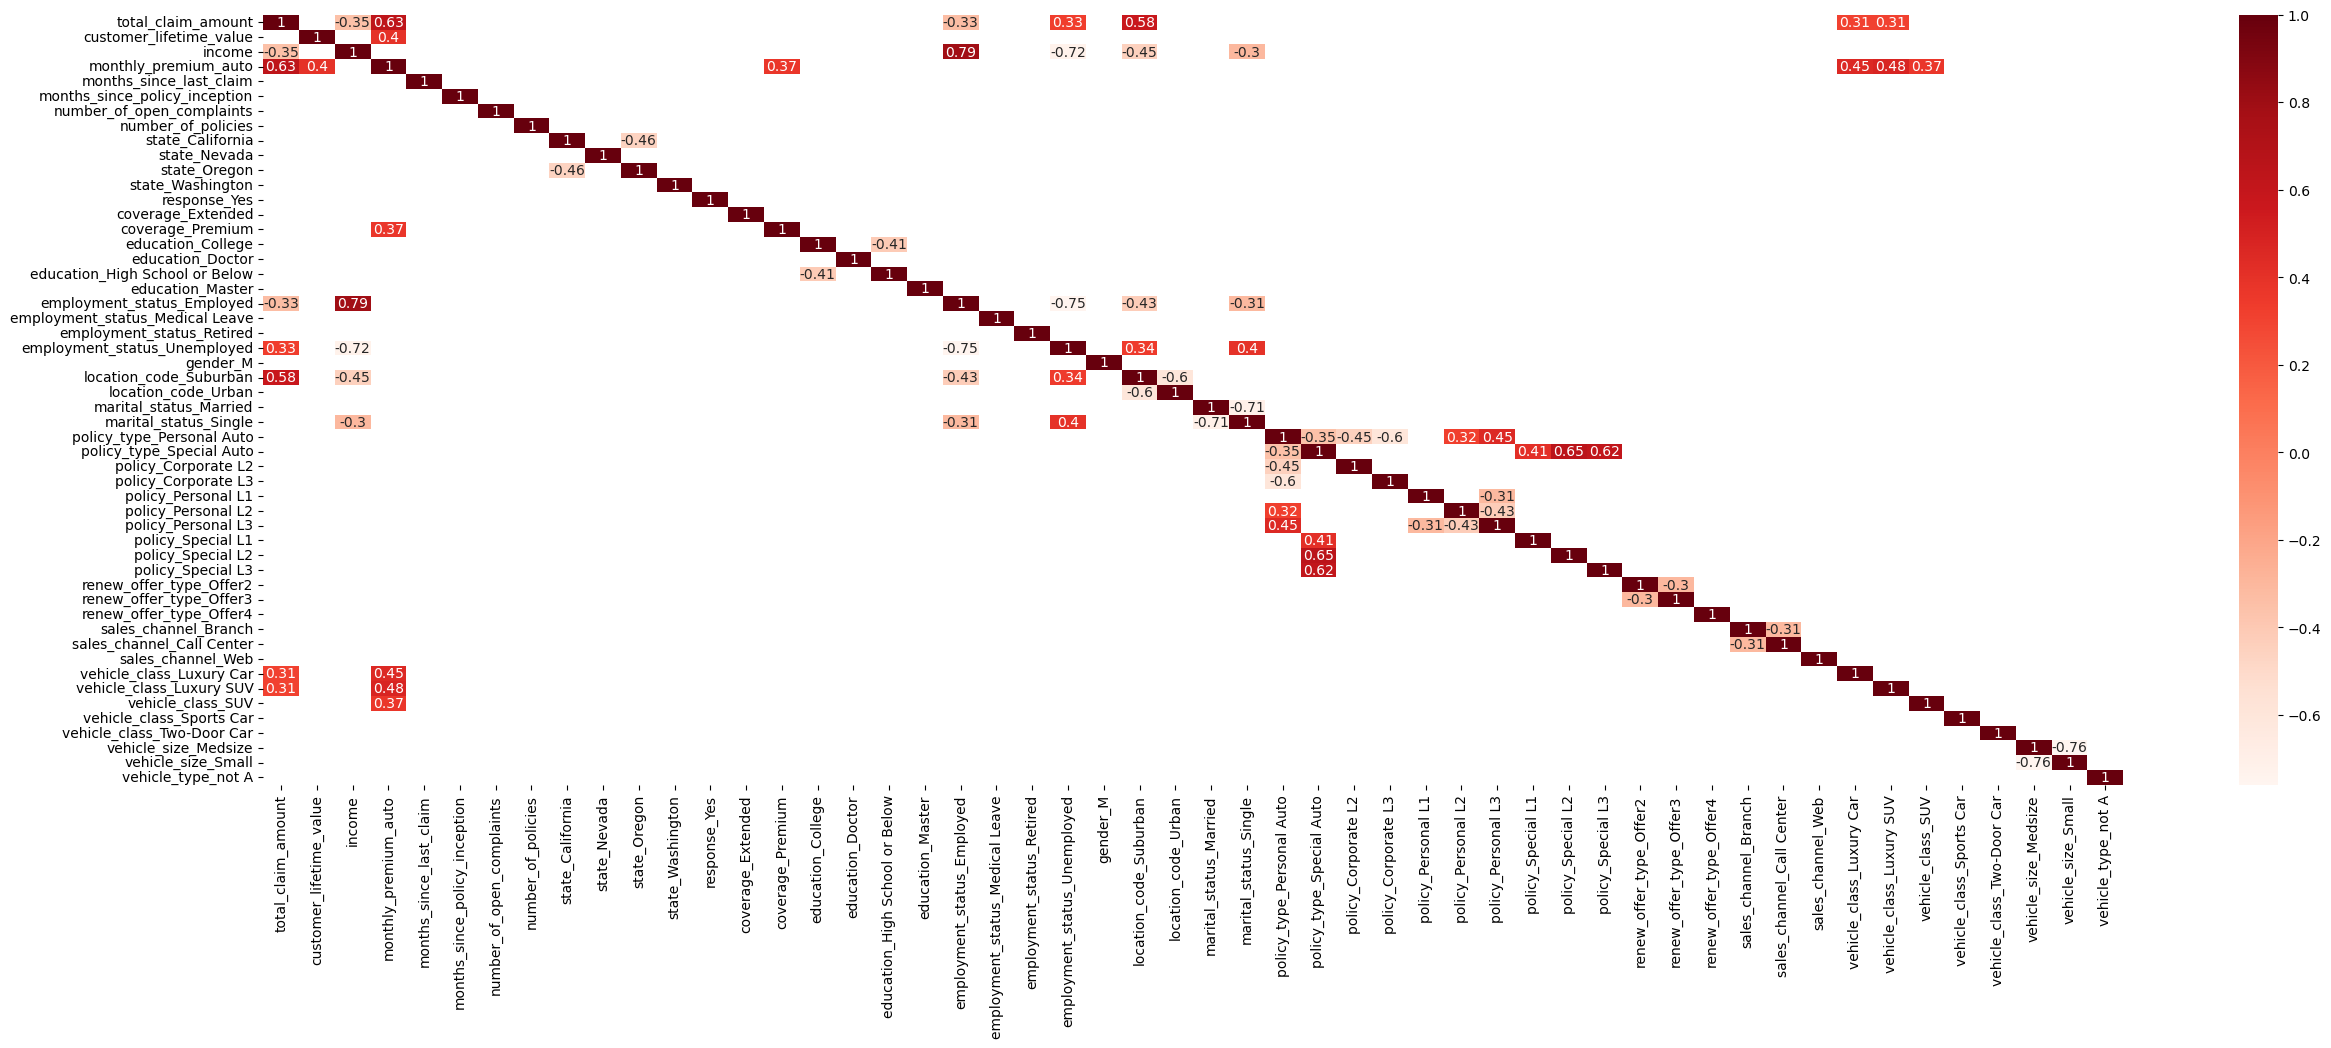

In [90]:
# the heatmap for the categoricals
plt.figure(figsize=(30,10))
sns.heatmap(filtered_matrix, annot=True, cmap="Reds")
plt.show()

In [91]:
## From Round 7: use the concept of multicollinearity and remove insignificant variables
# so check if there is a correlation between the 7 variables.

In [92]:
filtered_matrix['monthly_premium_auto']

#lowly correlated with "vehicle_class_Luxury Car" (0.451538)
#lowly correlated with "vehicle_class_Luxury SUV" (0.484589)

#makes sense... 

total_claim_amount                 0.63
customer_lifetime_value            0.40
income                              NaN
monthly_premium_auto               1.00
months_since_last_claim             NaN
months_since_policy_inception       NaN
number_of_open_complaints           NaN
number_of_policies                  NaN
state_California                    NaN
state_Nevada                        NaN
state_Oregon                        NaN
state_Washington                    NaN
response_Yes                        NaN
coverage_Extended                   NaN
coverage_Premium                   0.37
education_College                   NaN
education_Doctor                    NaN
education_High School or Below      NaN
education_Master                    NaN
employment_status_Employed          NaN
employment_status_Medical Leave     NaN
employment_status_Retired           NaN
employment_status_Unemployed        NaN
gender_M                            NaN
location_code_Suburban              NaN


In [93]:
filtered_matrix['income']

#highly correlated with "employment_status_Employed" (0.794671)
#highly correlated with "employment_status_Unemployed" (-0.722468)
#lowly correlated with "location_code_Suburban" (-0.450730)

#--> toss the employment status Employed and Unemployed and keep only income!

total_claim_amount                -0.35
customer_lifetime_value             NaN
income                             1.00
monthly_premium_auto                NaN
months_since_last_claim             NaN
months_since_policy_inception       NaN
number_of_open_complaints           NaN
number_of_policies                  NaN
state_California                    NaN
state_Nevada                        NaN
state_Oregon                        NaN
state_Washington                    NaN
response_Yes                        NaN
coverage_Extended                   NaN
coverage_Premium                    NaN
education_College                   NaN
education_Doctor                    NaN
education_High School or Below      NaN
education_Master                    NaN
employment_status_Employed         0.79
employment_status_Medical Leave     NaN
employment_status_Retired           NaN
employment_status_Unemployed      -0.72
gender_M                            NaN
location_code_Suburban            -0.45


In [94]:
filtered_matrix['location_code_Suburban']
#lowly correlated with "income" (-0.450730)

total_claim_amount                 0.58
customer_lifetime_value             NaN
income                            -0.45
monthly_premium_auto                NaN
months_since_last_claim             NaN
months_since_policy_inception       NaN
number_of_open_complaints           NaN
number_of_policies                  NaN
state_California                    NaN
state_Nevada                        NaN
state_Oregon                        NaN
state_Washington                    NaN
response_Yes                        NaN
coverage_Extended                   NaN
coverage_Premium                    NaN
education_College                   NaN
education_Doctor                    NaN
education_High School or Below      NaN
education_Master                    NaN
employment_status_Employed        -0.43
employment_status_Medical Leave     NaN
employment_status_Retired           NaN
employment_status_Unemployed       0.34
gender_M                            NaN
location_code_Suburban             1.00


In [95]:
filtered_matrix['vehicle_class_Luxury Car']
#lowly correlated with "monthly_premium_auto" (0.451538)

#--> toss the vehicle_class Luxury Car/SUV

total_claim_amount                 0.31
customer_lifetime_value             NaN
income                              NaN
monthly_premium_auto               0.45
months_since_last_claim             NaN
months_since_policy_inception       NaN
number_of_open_complaints           NaN
number_of_policies                  NaN
state_California                    NaN
state_Nevada                        NaN
state_Oregon                        NaN
state_Washington                    NaN
response_Yes                        NaN
coverage_Extended                   NaN
coverage_Premium                    NaN
education_College                   NaN
education_Doctor                    NaN
education_High School or Below      NaN
education_Master                    NaN
employment_status_Employed          NaN
employment_status_Medical Leave     NaN
employment_status_Retired           NaN
employment_status_Unemployed        NaN
gender_M                            NaN
location_code_Suburban              NaN


In [96]:
y # ['total_claim_amount'] from above.  
X = X[['monthly_premium_auto', 'income', 'employment_status_Employed','employment_status_Unemployed','location_code_Suburban','vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV']]

# #Round 7: try without "insignificant variables" employment_status, vehicle_class Luxury Car/SUV
# X = X[['monthly_premium_auto','location_code_Suburban']]
# X

In [97]:
# We do the Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8225, 7)
(1452, 7)
(8225,)
(1452,)


In [99]:
# We caculate the linear regression based on the "train"-data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)

b0 =  82.51230175314379
b1 =  [1154.17022675  -28.36949524   -1.28018791   94.33389798  284.98935312
   71.78200062   49.24426731]


#### Round 6 - Linear Regression -  #4 Apply linear regression.

In [100]:
# We compare the predicted y-data (applied linear regression on x_train) and compare it with our y_train data.
y_predicted = lm.predict(X_train)
r2_score(y_train, y_predicted)
# our r2 score is good.

0.7013348626384905

#### Round 6 - Model Validation -  #5 Description R2

In [101]:
# We apply the linear regression on the x-test and compare it with our y-test
y_predicted_test = lm.predict(X_test)
R2 = r2_score(y_test, y_predicted_test)
print("R2-score is ", R2)
# our r2 score is even better. This is interesting, because you would expect it to be the other way round, 
# since it is more difficult to be close to a small dataset, that was defined by a bigger dataset.

R2-score is  0.7319133745871689


In [102]:
y_test[:5]

8528    292.800000
3540    619.200000
7331    299.356083
7920    537.600000
1631    504.000000
Name: total_claim_amount, dtype: float64

In [103]:
y_predicted_test[:5]

array([362.31273939, 690.3920796 , 196.86596088, 602.99124711,
       568.90097989])

#### Round 6 - Model Validation -  #6 Description MSE

In [104]:
mse=mean_squared_error(y_test,y_predicted_test)
mse
print("mean squared error (MSE) is ", mse)

# --> the mean squared error is the error ^2 so the error seems extremely large! that is why to have a 
# better understanding/relation with the data, the RMSE is more "relatable"

#Round 6: 21780.55771867215
#Round 7 without Employment Status: 22531.810977831443
#Round 7 without Employment Status + Luxury Car/SUV: 22641.020956354456
#Round 7 only 'monthly_premium_auto','location_code_Suburban': 23960.230603560052
#Round 7 with MIN-MAX-Scale: 21780.55771867215 --> no difference.. ? why ?
#Round 7 with 0.15: 20785.98606442319 !!! Better !!!
#Round 7 with 0.25: 22890.035134861595, worse...
#Round 7 with 0.10: 21348.528873555086 !!! Better !!!
#Round 7 with 0.05: 20300.42282084946 !!! Better !!!

# --> by removing some variables, the error couldn't be made better..
# --> we keep all the variables

mean squared error (MSE) is  20785.98606442319


#### Round 6 - Model Validation -  #7 Description RMSE

In [105]:
rmse = np.sqrt(mean_squared_error(y_test,y_predicted_test))
rmse
print("root mean squared error (RMSE) is ", rmse)

# --> the RMSE is compared to the five couples (y_test[:5] and predictions_test[:5]) the triple than expected..

#Round 6: 147.58237604359184
#Round 7 without Employment Status: 150.10599914004584 --> not very helpful...
#Round 7 without Employment Status + Luxury Car/SUV: 150.4693356014921
#Round 7 only 'monthly_premium_auto','location_code_Suburban': 154.7909254561134
#Round 7 with MIN-MAX-Scale: 147.58237604359184 --> no difference.. ? why ?


root mean squared error (RMSE) is  144.17345825228438


In [106]:
#Have a look at another sample, to get an impression of the error... Since it seems very big.
abs(y_test[50:60]-y_predicted_test[50:60])

8057    218.011117
6831    231.397651
7475     72.421809
4099    382.411155
7341     85.420250
2619     33.201764
6810     64.257620
7346    177.840065
6419    427.221672
5027    178.872768
Name: total_claim_amount, dtype: float64

#### Round 6 - Model Validation -  #8 Description MAE

In [107]:
mae = mean_absolute_error(y_test, y_predicted_test)
print("mean absolute error (MAE) is ", mae)

#Round 6: 109.21649592507937
#Round 7 without Employment Status: 113.20024356020065
#Round 7 without Employment Status + Luxury Car/SUV: 113.62662388135328
#Round 7 only 'monthly_premium_auto','location_code_Suburban': 118.55317357733347
#Round 7 with MIN-MAX-Scale: 109.21649592507936 --> no difference.. ? why ?

mean absolute error (MAE) is  106.49041952948316


# Round 7

Build a function, from round 2 and round 7, to clean and process the data.

In [108]:
def clean_and_process(x):
    ## Round 2
    ## Standardize Headers
    #Drop the first "Unnamed: 0" column
    if 'Unnamed: 0' in x.columns:
        x = x.drop(['Unnamed: 0'], axis=1)
    else:
        x = x
    #Headers all on lower case and replace the space by "_"
    header = []
    for item in x.columns:
        header.append(item.lower().replace(' ', '_'))
    x.columns = header
    #Headers without space
    x = x.rename(columns={'EmploymentStatus':'Employment Status'})
    
    ## Check for duplicates
    x = x.drop_duplicates()
    
    ## taking care of the NAN-Values:
    #droping the NAN-Values for 'state' and 'response'
    x = x[x['state'].isna()==False]
    #droping the NAN-Values for 'months_since_last_claim' and 'number_of_open_complaints'
    x = x[x['months_since_last_claim'].isna()==False]
    #fill the 'vehicle_class' with the mean value
    x['vehicle_class'] = x['vehicle_class'].fillna(x['vehicle_class'].value_counts(dropna=True).index[0])
    #fill the 'vehicle_size' with the mean value
    x['vehicle_size'] = x['vehicle_size'].fillna(x['vehicle_size'].value_counts(dropna=True).index[0])
    #fill the NAN of vehicle_type with 'not A', because 50%
    x['vehicle_type'] = x['vehicle_type'].fillna('not A')
    #
    x['effective_to_date'] = pd.to_datetime(x['effective_to_date'], errors='coerce')
    x['effective_to_date_month'] = x['effective_to_date'].dt.month
    
    ## Round 3
    # describing the numerical columns
    summary_numerical = x.describe().T 

    # additionnaly we add the range and the iqr
    summary_numerical['iqr'] = summary_numerical['75%']-summary_numerical['25%']
    summary_numerical['range'] = summary_numerical['max']-summary_numerical['min']
    display(summary_numerical)
    
    # categorical
    summary_objects = x.describe(include=[np.object]).T
    display(summary_objects)
    
    #DataFrame info
    info_data = x.info()
    display(info_data)
    
    #Plottings --> no use in cleaning and processing the data, so not coded in the function.
    #Round 4 was correlation with the numericals, this is done again in Round 5.
    
    ## Round 5
    #X-y split
    y = x['total_claim_amount']
    X = x.drop(['total_claim_amount', 'customer', 'effective_to_date', 'effective_to_date_month'], axis=1)
    
    X_num = X.select_dtypes(np.number)
    X_cat = X.select_dtypes(object)
    
    # Normalizing data - MinMaxScaler:
    transformer = MinMaxScaler().fit(X_num)
    X_num_normalized = transformer.transform(X_num)
    X_num_normalized = pd.DataFrame(X_num_normalized, columns=X_num.columns)
    
#     # Standardization or Z-Score Normalization
#     transformer = StandardScaler().fit(X_num)
#     X_num_normalized = transformer.transform(X_num)
#     X_num_normalized = pd.DataFrame(X_num_normalized, columns=X_num.columns)
    
    #Categorical Variables
    encoder = OneHotEncoder(drop='first').fit(X_cat) # the first one is the most frequent one.
    encoded = encoder.transform(X_cat).toarray()
    cols = encoder.get_feature_names(input_features=X_cat.columns)
    onehot_encoded = pd.DataFrame(encoded, columns=cols)
    
    #Concatenating:
    X = pd.concat([X_num_normalized, onehot_encoded], axis=1)
    display(X)
    
    return X

data_mca_test2 = pd.read_csv('./marketing_customer_analysis.csv')
data_mca_test2.shape

(10910, 26)

In [109]:
data_mca_test2 = clean_and_process(data_mca_test2)
data_mca_test2.shape

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,9677.0,8042.074480,6962.485040,1898.007675,3991.727249,5771.610372,8986.610653,83325.381190,4994.883404,81427.373515
income,9677.0,37675.184251,30380.910214,0.000000,0.000000,34080.000000,62291.000000,99981.000000,62291.000000,99981.000000
monthly_premium_auto,9677.0,93.210189,34.470303,61.000000,68.000000,83.000000,109.000000,298.000000,41.000000,237.000000
months_since_last_claim,9677.0,15.126692,10.061924,0.000000,6.000000,14.000000,23.000000,35.000000,17.000000,35.000000
months_since_policy_inception,9677.0,48.132479,27.910487,0.000000,24.000000,48.000000,71.000000,99.000000,47.000000,99.000000
number_of_open_complaints,9677.0,0.383383,0.910508,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.000000
number_of_policies,9677.0,2.959595,2.387208,1.000000,1.000000,2.000000,4.000000,9.000000,3.000000,8.000000
total_claim_amount,9677.0,434.380123,291.476686,0.099007,272.649844,383.167471,547.200000,2893.239678,274.550156,2893.140671
effective_to_date_month,9677.0,1.463263,0.498674,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000


,count,unique,top,freq
customer,9677,9134,BG42047,3
state,9677,5,California,3344
response,9677,2,No,8289
coverage,9677,3,Basic,5905
education,9677,5,Bachelor,2913
employmentstatus,9677,5,Employed,6035
gender,9677,2,F,4934
location_code,9677,3,Suburban,6126
marital_status,9677,3,Married,5605
policy_type,9677,3,Personal Auto,7208


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9677 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9677 non-null   object        
 1   state                          9677 non-null   object        
 2   customer_lifetime_value        9677 non-null   float64       
 3   response                       9677 non-null   object        
 4   coverage                       9677 non-null   object        
 5   education                      9677 non-null   object        
 6   effective_to_date              9677 non-null   datetime64[ns]
 7   employmentstatus               9677 non-null   object        
 8   gender                         9677 non-null   object        
 9   income                         9677 non-null   int64         
 10  location_code                  9677 non-null   object        
 11  marital_status  

None

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_not A
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9672,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9673,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9674,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9675,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


(9677, 51)